# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [1]:
# Họ và Tên: Đậu Thiện Tường
# MSSV: 2174802010639

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X,y = load_dataset()
print(X.shape, y.shape)

(100, 4) (100,)


Kết quả: (100, 4) (100,)

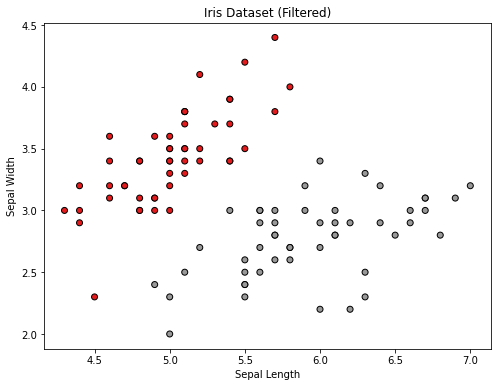

In [5]:
#Trực quan hóa dữ liệu data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Filtered)')
plt.show()


Kết quả

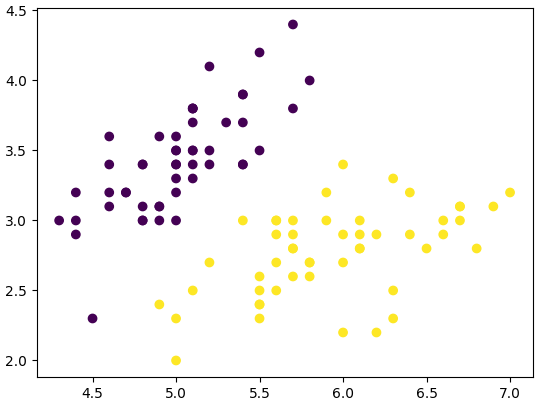

In [6]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        #Điền ở đây theo comment                # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        self.linear = nn.Linear(n_features, 1)
    
    def forward(self, x):
        x

In [7]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    def __len__(self):
        return  len(self.X)
    
    def __getitem__(self, idx):
        return  self.X[idx], self.y[idx]           #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx
    

In [8]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

In [9]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size =   int(0.7*len(dataset))                                  #70%
test_size =    len(dataset) - train_size                             #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [10]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [11]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    accuracy = correct / total
    test_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 0.6521, Test Loss: 0.8818, Test Accuracy: 0.3000
Epoch 2/200, Train Loss: 0.5984, Test Loss: 0.7277, Test Accuracy: 0.3000
Epoch 3/200, Train Loss: 0.5333, Test Loss: 0.6538, Test Accuracy: 0.3333
Epoch 4/200, Train Loss: 0.5051, Test Loss: 0.6216, Test Accuracy: 0.3667
Epoch 5/200, Train Loss: 0.4927, Test Loss: 0.6189, Test Accuracy: 0.3667
Epoch 6/200, Train Loss: 0.4868, Test Loss: 0.5555, Test Accuracy: 0.9000
Epoch 7/200, Train Loss: 0.4673, Test Loss: 0.5221, Test Accuracy: 1.0000
Epoch 8/200, Train Loss: 0.4573, Test Loss: 0.5004, Test Accuracy: 1.0000
Epoch 9/200, Train Loss: 0.4508, Test Loss: 0.5105, Test Accuracy: 1.0000
Epoch 10/200, Train Loss: 0.4476, Test Loss: 0.5011, Test Accuracy: 1.0000
Epoch 11/200, Train Loss: 0.4422, Test Loss: 0.4790, Test Accuracy: 1.0000
Epoch 12/200, Train Loss: 0.4361, Test Loss: 0.4899, Test Accuracy: 1.0000
Epoch 13/200, Train Loss: 0.4331, Test Loss: 0.4828, Test Accuracy: 1.0000
Epoch 14/200, Train Loss: 0.4286, 

C:\Users\Admin\AppData\Local\Temp\ipykernel_13892\1336481629.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


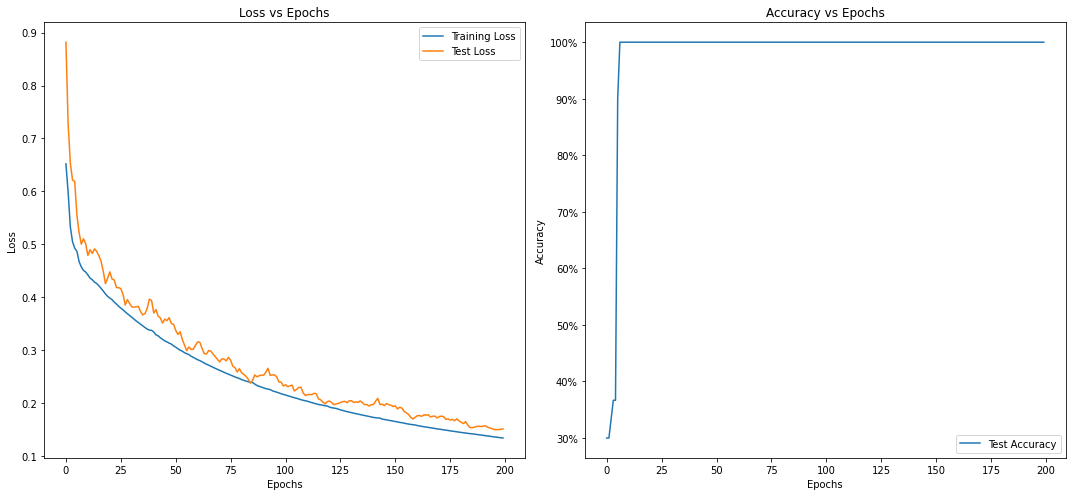

In [18]:
# Vẽ biểu đồ loss và accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Biểu đồ Loss
plt.subplot(121)
plt.plot(range(n_epochs), train_losses, label='Training Loss')
plt.plot(range(n_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Biểu đồ Accuracy
plt.subplot(122)
plt.plot(range(n_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()

plt.tight_layout()
plt.show()

#Kết quả:

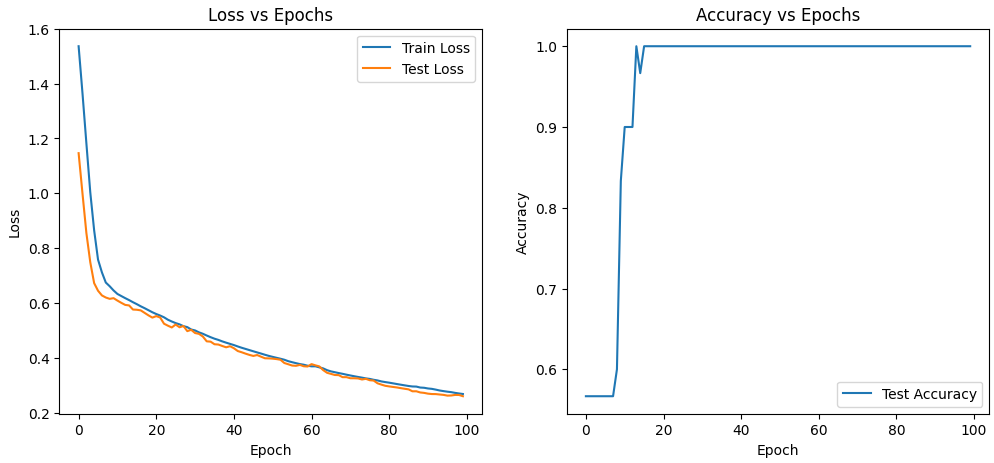